In this notebook, I am working with the World Dataset, specifically focusing on laguage diversity data. The data already extracted using SQL queries includes non-available and null values that need to be cleaned during the data cleaning process. The aim of this notebook is to display learnings from the extracted data using the Matplotlib library.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\sorin.creanga\Desktop\Visualisations\luanguage_diversity_csv.csv",index_col = 0)
data.head()
data

,Continent,TotalLanguagesSpoken,PrimaryOfficialLanguage,AvgLanguageSpread
CountryName,,,,
Aruba,North America,4,Dutch,24.73
Afghanistan,Asia,5,Pashto,19.22
Angola,Africa,9,NaN,10.60
Anguilla,North America,1,English,0.00
Albania,Europe,3,Albaniana,33.27
...,...,...,...,...
Yemen,Asia,2,Arabic,49.80
Yugoslavia,Europe,6,Serbo-Croatian,16.28
South Africa,Africa,11,Zulu,8.95


In [8]:
"""
Identifying series with missing data for the primary official language column. I am also separating them for further visual representations.

"""

data_prim_lang_empty = data[data["PrimaryOfficialLanguage"].isna()]
continent_counts = data_prim_lang_empty["Continent"].value_counts()


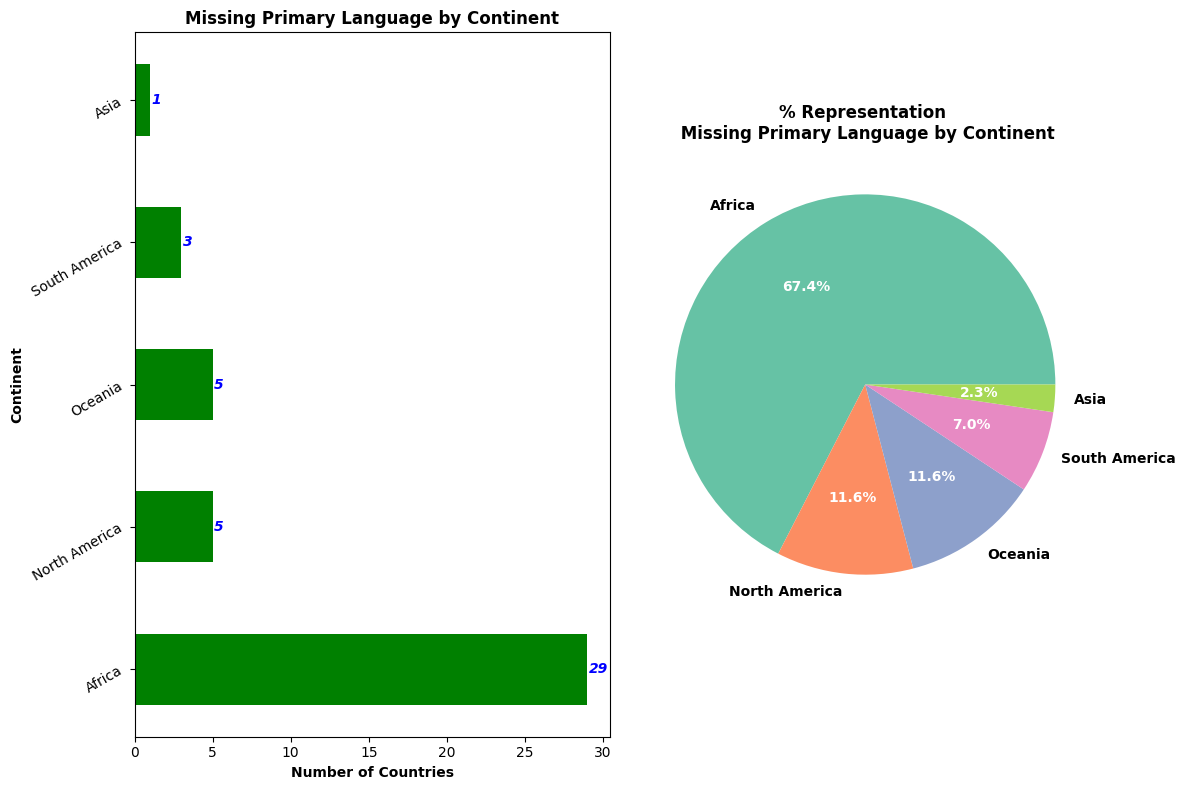

In [33]:
fig, axes = plt.subplots(1,2, figsize = (12,8))

#first chart

axes[0].barh(continent_counts.index, continent_counts.values, color = "g", height = 0.5)

for i, value in enumerate(continent_counts.values):
    axes[0].text(
        value + 0.1,
        i,
        int(value),
        va="center", color = "b", fontsize = "medium", fontstyle = "italic", fontweight ="bold"
    )


axes[0].set_title("Missing Primary Language by Continent", fontweight = "bold")
axes[0].set_xlabel("Number of Countries", fontweight = "bold")
axes[0].set_ylabel("Continent", fontweight = "bold")
axes[0].tick_params(axis="y",rotation = 30)

#second chart
import seaborn as sns
colors = sns.color_palette("Set2")

wedges, texts, autotexts = axes[1].pie(continent_counts,labels = continent_counts.index, colors = colors, autopct='%1.1f%%', textprops={'fontweight': 'bold'} )
axes[1].set_title("% Representation \n Missing Primary Language by Continent", fontweight = "bold")
for t in autotexts:
    t.set_fontweight('bold')
    t.set_color('white')
    t.set_fontsize(10)

fig.tight_layout()